In [4]:
import math
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class PositionalEncoding(nn.Module):
  def __init__(self, model_dimension, dropout_rate, max_length = 10000):
    super().__init__()
    self.dropout = nn.Dropout(dropout_rate)
    self.register_buffer('positional_encodings', get_positional_encoding(model_dimension, max_length), False)

  def forward(self, x):
    position = self.positional_encodings[:x.shape[0]].detach().requires_grad_(False)
    x = x + position
    return self.dropout(x)


In [3]:
def get_positional_encoding(model_dimension, max_length = 10000):
  encodings = torch.zeros(max_length, model_dimension)
  pos = torch.arange(0, max_length, dtype = torch.float32).unsqueeze(1)
  # from formula
  i = torch.arange(0, model_dimension, 2, dtype = torch.float32)
  division_term = torch.exp(i * -(math.log(10000) / model_dimension))
  encodings[:, 0::2] = torch.sin(pos * division_term)
  encodings[:, 1::2] = torch.cos(pos * division_term)
  encodings = encodings.unsqueeze(1).requires_grad_(False)
  return encodings

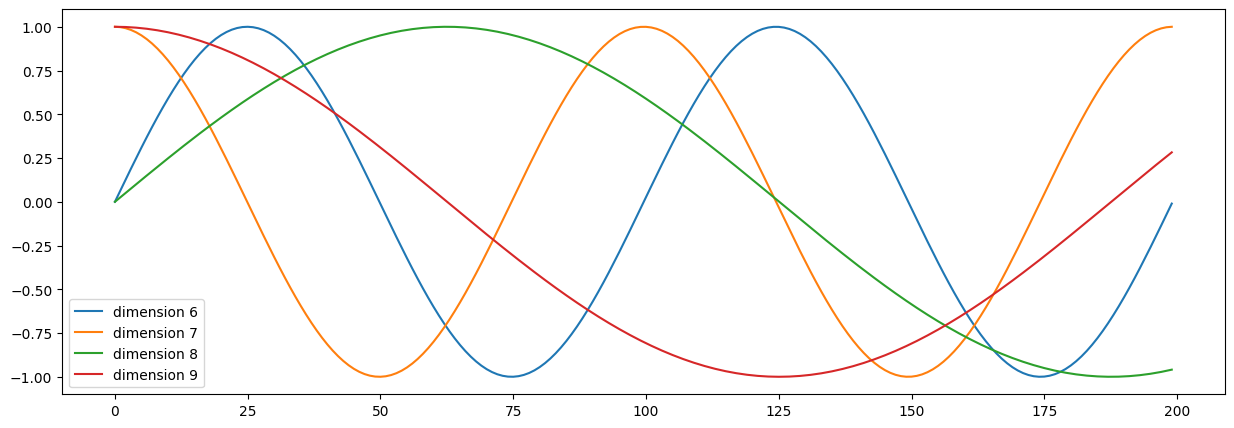

In [13]:
plt.figure(figsize=(15, 5))
pe = get_positional_encoding(20, 200)
plt.plot(np.arange(200), pe[:, 0, 6:10].numpy())
plt.legend(["dimension %d" % p for p in [6, 7, 8, 9]])
plt.show()